<a href="https://colab.research.google.com/github/MiguelOrtega630/IA_2025/blob/main/clase_22_octubre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Agenda
1.Objetivo de estudio

In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
datos=pd.read_csv('https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv')
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


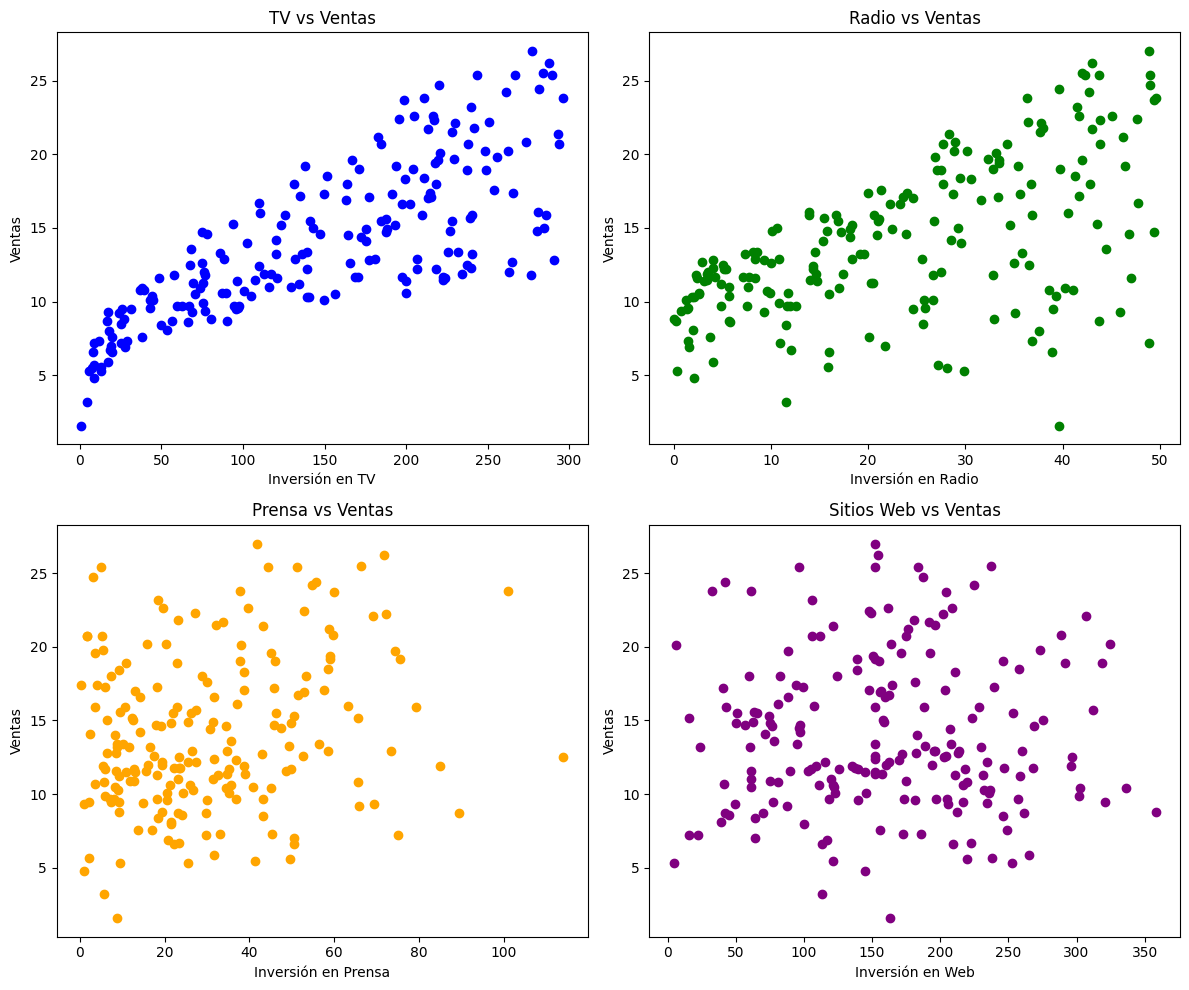

In [92]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

axes[0,0].scatter(datos['TV'], datos['Sales'], color='blue')
axes[0,0].set_xlabel('Inversión en TV')
axes[0,0].set_ylabel('Ventas')
axes[0,0].set_title('TV vs Ventas')

axes[0,1].scatter(datos['Radio'], datos['Sales'], color='green')
axes[0,1].set_xlabel('Inversión en Radio')
axes[0,1].set_ylabel('Ventas')
axes[0,1].set_title('Radio vs Ventas')

axes[1,0].scatter(datos['Newspaper'], datos['Sales'], color='orange')
axes[1,0].set_xlabel('Inversión en Prensa')
axes[1,0].set_ylabel('Ventas')
axes[1,0].set_title('Prensa vs Ventas')

axes[1,1].scatter(datos['Web'], datos['Sales'], color='purple')
axes[1,1].set_xlabel('Inversión en Web')
axes[1,1].set_ylabel('Ventas')
axes[1,1].set_title('Sitios Web vs Ventas')

plt.tight_layout()
plt.show()

In [91]:
print("Observaciones y variables",datos.shape)
datos.info()


Observaciones y variables (200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


In [105]:
datos.dtypes

,0
TV,float64
Radio,float64
Online,float64
Ventas,float64


In [95]:
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


In [96]:
datos = datos[["TV", "Radio", "Newspaper", "Web", "Sales"]]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


In [ ]:
x_entrena, x_valida, y_entrena, y_valida = train_test_split(datos.drop(columns=["Sales"]), datos["Sales"],train_size=0.7,random_state=1279)


In [97]:
print("Estructura de datos de entrenamiento:",x_entrena.shape)

Estructura de datos de entrenamiento: (140, 4)


##4.1 MODELANDO EL ÁRBOL DE DECISIÓN
La clase DecisionTreeClassifier implementa el algoritmo de clasificación basado en árboles de decisión.


In [ ]:
modelo_ar=DecisionTreeRegressor(max_depth=3,random_state=2022)

Usamos los datos de entrenamiento

In [98]:
modelo_ar.fit(x_entrena,y_entrena)

DecisionTreeRegressor(max_depth=3)

In [ ]:
print(f"Profundidad del árbol: {modelo_ar.get_depth()}")
print(f"Cantidad de nodos terminales: {modelo_ar.get_n_leaves()}")

[Text(0.5, 0.875, 'TV <= 156.63\nsamples = 140\nvalue = 569.49'),
 Text(0.25, 0.625, 'TV <= 60.01\nsamples = 68\nvalue = 380.38'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'TV <= 28.65\nsamples = 20\nvalue = 247.65'),
 Text(0.0625, 0.125, 'samples = 7\nvalue = 191.67'),
 Text(0.1875, 0.125, 'samples = 13\nvalue = 277.8'),
 Text(0.375, 0.375, 'TV <= 110.09\nsamples = 48\nvalue = 435.68'),
 Text(0.3125, 0.125, 'samples = 32\nvalue = 403.21'),
 Text(0.4375, 0.125, 'samples = 16\nvalue = 500.62'),
 Text(0.75, 0.625, 'TV <= 236.93\nsamples = 72\nvalue = 748.1'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'TV <= 201.76\nsamples = 37\nvalue = 657.95'),
 Text(0.5625, 0.125, 'samples = 21\nvalue = 617.53'),
 Text(0.6875, 0.125, 'samples = 16\nvalue = 711.0'),
 Text(0.875, 0.375, 'TV <= 272.16\nsamples = 35\nvalue = 843.39'),
 Text(0.8125, 0.125, 'samples = 20\nvalue = 809.4'),
 Text(0.9375, 0.125, 'samples = 15\nvalue = 888.71')]

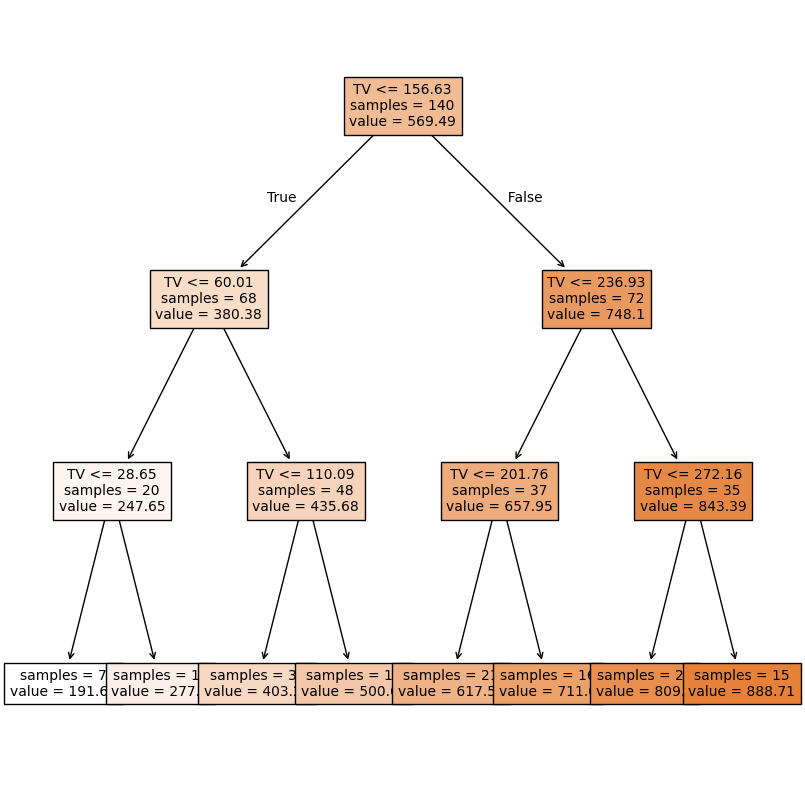

In [100]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_tree(
    decision_tree=modelo_ar,
    filled=True,
    feature_names=datos.drop(columns=["Sales"]).columns,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)

In [ ]:
texto_modelo=export_text(decision_tree=modelo_ar,feature_names=datos.drop(columns=["Sales"]).columns)
print(texto_modelo)

|--- TV <= 156.63
|   |--- TV <= 63.64
|   |   |--- TV <= 35.92
|   |   |   |--- value: [203.21]
|   |   |--- TV >  35.92
|   |   |   |--- value: [295.54]
|   |--- TV >  63.64
|   |   |--- TV <= 110.09
|   |   |   |--- value: [417.62]
|   |   |--- TV >  110.09
|   |   |   |--- value: [492.89]
|--- TV >  156.63
|   |--- TV <= 236.93
|   |   |--- TV <= 183.50
|   |   |   |--- value: [589.77]
|   |   |--- TV >  183.50
|   |   |   |--- value: [687.44]
|   |--- TV >  236.93
|   |   |--- TV <= 290.61
|   |   |   |--- value: [845.26]
|   |   |--- TV >  290.61
|   |   |   |--- value: [934.59]



##4.3 Predicciones

In [101]:
importancia_predictores=pd.DataFrame({
    "predictor":x_entrena.columns,
    "importancia":modelo_ar.feature_importances_
})

In [ ]:
importancia_predictores.sort_values(by="importancia",ascending=False)

,predictor,importancia
0,TV,1.0
1,Radio,0.0
2,Newspaper,0.0
3,Web,0.0
